    Name: FADHLUDDIN BIN SAHLAN
    Matric No: 1817445
    Test 2

In [1]:
import findspark
findspark.init()

import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession

IMPORT PANDAS AND MATPLOTLIB FOR PURPOSE OF VISUALIZATION ONLY

In [63]:
import pandas as pd
import matplotlib.pyplot as plot

STARTING SPARK SESSION

In [2]:
spark = SparkSession\
        .builder\
        .appName("Test2")\
        .getOrCreate()

In [3]:
spark.sparkContext.getConf().getAll()

[('spark.app.id', 'local-1623224262335'),
 ('spark.app.startTime', '1623224259705'),
 ('spark.driver.port', '49958'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.host', 'DESKTOP-6LUOD3E'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.sql.warehouse.dir',
  'file:/C:/Users/YS/Jupyter%20Notebook/Test2/spark-warehouse'),
 ('spark.app.name', 'Test2'),
 ('spark.ui.showConsoleProgress', 'true')]

In [4]:
spark

# Explore the Datasets

In [47]:
df_demo = spark.read.csv("survey data demographics.csv", header=True)
df_tech = spark.read.csv("survey data technologies normalised.csv", header=True)

In [10]:
df_demo.printSchema()

root
 |-- Respondent: string (nullable = true)
 |-- MainBranch: string (nullable = true)
 |-- Hobbyist: string (nullable = true)
 |-- OpenSourcer: string (nullable = true)
 |-- OpenSource: string (nullable = true)
 |-- Employment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Student: string (nullable = true)
 |-- EdLevel: string (nullable = true)
 |-- UndergradMajor: string (nullable = true)
 |-- EduOther: string (nullable = true)
 |-- OrgSize: string (nullable = true)
 |-- DevType: string (nullable = true)
 |-- YearsCode: string (nullable = true)
 |-- Age1stCode: string (nullable = true)
 |-- YearsCodePro: string (nullable = true)
 |-- CareerSat: string (nullable = true)
 |-- JobSat: string (nullable = true)
 |-- MgrIdiot: string (nullable = true)
 |-- MgrMoney: string (nullable = true)
 |-- MgrWant: string (nullable = true)
 |-- JobSeek: string (nullable = true)
 |-- LastHireDate: string (nullable = true)
 |-- LastInt: string (nullable = true)
 |-- FizzBuzz: s

In [11]:
df_tech.printSchema()

root
 |-- Respondent: string (nullable = true)
 |-- LanguageWorkedWith: string (nullable = true)
 |-- LanguageDesireNextYear: string (nullable = true)
 |-- DatabaseWorkedWith: string (nullable = true)
 |-- DatabaseDesireNextYear: string (nullable = true)
 |-- PlatformWorkedWith: string (nullable = true)
 |-- PlatformDesireNextYear: string (nullable = true)
 |-- WebFrameWorkedWith: string (nullable = true)
 |-- WebFrameDesireNextYear: string (nullable = true)
 |-- DevEnviron: string (nullable = true)
 |-- OpSys: string (nullable = true)
 |-- Containers: string (nullable = true)
 |-- BlockchainOrg: string (nullable = true)
 |-- BlockchainIs: string (nullable = true)



In [12]:
df_demo.count()

11398

In [101]:
from pyspark.sql.functions import regexp_replace, regexp_extract
from pyspark.sql.functions import col
from pyspark.sql.functions import when
from pyspark.sql.window import Window
import pyspark.sql.functions as f

In [27]:
data_agg = df_demo.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in df_demo.columns])
data_agg.collect()

[Row(Respondent=0, MainBranch=0, Hobbyist=0, OpenSourcer=0, OpenSource=81, Employment=0, Country=0, Student=51, EdLevel=112, UndergradMajor=737, EduOther=164, OrgSize=96, DevType=65, YearsCode=9, Age1stCode=13, YearsCodePro=16, CareerSat=0, JobSat=1, MgrIdiot=493, MgrMoney=497, MgrWant=493, JobSeek=0, LastHireDate=0, LastInt=413, FizzBuzz=37, JobFactors=3, ResumeUpdate=39, CurrencySymbol=0, CurrencyDesc=0, CompTotal=809, CompFreq=206, ConvertedComp=816, WorkWeekHrs=122, WorkPlan=121, WorkChallenge=164, WorkRemote=8, WorkLoc=32, ImpSyn=5, CodeRev=1, CodeRevHrs=2426, UnitTests=29, PurchaseHow=196, PurchaseWhat=38, BetterLife=98, ITperson=35, OffOn=38, SocialMedia=293, Extraversion=20, ScreenName=507, SOVisit1st=325, SOVisitFreq=5, SOVisitTo=1, SOFindAnswer=3, SOTimeSaved=50, SOHowMuchTime=1917, SOAccount=1, SOPartFreq=1128, SOJobs=6, EntTeams=5, SOComm=0, WelcomeChange=85, SONewContent=1965, Age=287, Gender=73, Trans=123, Sexuality=542, Ethnicity=675, Dependents=140, SurveyLength=19, Sur

In [15]:
df_demo.select('Country').distinct().collect()

[Row(Country="Côte d'Ivoire"),
 Row(Country='Paraguay'),
 Row(Country='The former Yugoslav Republic of Macedonia'),
 Row(Country='Yemen'),
 Row(Country='Senegal'),
 Row(Country='Sweden'),
 Row(Country='Hong Kong (S.A.R.)'),
 Row(Country='Republic of Korea'),
 Row(Country='Philippines'),
 Row(Country='Singapore'),
 Row(Country='Malaysia'),
 Row(Country='Turkey'),
 Row(Country='Iraq'),
 Row(Country='Germany'),
 Row(Country='Afghanistan'),
 Row(Country='Cambodia'),
 Row(Country='Jordan'),
 Row(Country='Rwanda'),
 Row(Country='Sudan'),
 Row(Country='France'),
 Row(Country='Greece'),
 Row(Country='Sri Lanka'),
 Row(Country='Taiwan'),
 Row(Country='Algeria'),
 Row(Country='Togo'),
 Row(Country='Slovakia'),
 Row(Country='Venezuela, Bolivarian Republic of...'),
 Row(Country='Argentina'),
 Row(Country='Belgium'),
 Row(Country='Ecuador'),
 Row(Country='Qatar'),
 Row(Country='Albania'),
 Row(Country='Finland'),
 Row(Country='Nicaragua'),
 Row(Country='Ghana'),
 Row(Country='Myanmar'),
 Row(Countr

# Start Seeking Answer for Data Science Questions

QUESTION 1: WHAT IS THE SUMMARY OF YEARS RESPONDENTS DO CODING?

In [40]:
df_demo.describe('YearsCode').show()

+-------+-----------------+
|summary|        YearsCode|
+-------+-----------------+
|  count|            11389|
|   mean|12.38311345646438|
| stddev| 8.10850398692267|
|    min|                1|
|    max| Less than 1 year|
+-------+-----------------+



The result seems not right because of the string value of the column

In [48]:
df_demo.select('YearsCode').distinct().collect()

[Row(YearsCode='7'),
 Row(YearsCode='15'),
 Row(YearsCode='11'),
 Row(YearsCode='29'),
 Row(YearsCode='42'),
 Row(YearsCode='3'),
 Row(YearsCode='30'),
 Row(YearsCode='34'),
 Row(YearsCode='8'),
 Row(YearsCode='Less than 1 year'),
 Row(YearsCode='28'),
 Row(YearsCode='22'),
 Row(YearsCode='35'),
 Row(YearsCode='16'),
 Row(YearsCode='47'),
 Row(YearsCode=None),
 Row(YearsCode='43'),
 Row(YearsCode='5'),
 Row(YearsCode='31'),
 Row(YearsCode='18'),
 Row(YearsCode='27'),
 Row(YearsCode='17'),
 Row(YearsCode='26'),
 Row(YearsCode='46'),
 Row(YearsCode='6'),
 Row(YearsCode='19'),
 Row(YearsCode='41'),
 Row(YearsCode='23'),
 Row(YearsCode='40'),
 Row(YearsCode='38'),
 Row(YearsCode='25'),
 Row(YearsCode='44'),
 Row(YearsCode='33'),
 Row(YearsCode='48'),
 Row(YearsCode='9'),
 Row(YearsCode='24'),
 Row(YearsCode='32'),
 Row(YearsCode='1'),
 Row(YearsCode='20'),
 Row(YearsCode='36'),
 Row(YearsCode='10'),
 Row(YearsCode='37'),
 Row(YearsCode='49'),
 Row(YearsCode='4'),
 Row(YearsCode='39'),
 Row

Cleaning the Column and yield new cleaned column

In [51]:
regexstring = 'None|Less than 1 year'
df_demo = df_demo.withColumn('YearsCode_cleaned', regexp_replace(col('YearsCode'), regexstring, '0'))
df_demo = df_demo.na.fill('0', ['YearsCode_cleaned'])
df_demo = df_demo.withColumn('YearsCode_cleaned', df_demo.YearsCode_cleaned.cast('int'))
df_demo.select('YearsCode_cleaned').distinct().collect()

[Row(YearsCode_cleaned=31),
 Row(YearsCode_cleaned=34),
 Row(YearsCode_cleaned=28),
 Row(YearsCode_cleaned=26),
 Row(YearsCode_cleaned=27),
 Row(YearsCode_cleaned=44),
 Row(YearsCode_cleaned=12),
 Row(YearsCode_cleaned=22),
 Row(YearsCode_cleaned=47),
 Row(YearsCode_cleaned=1),
 Row(YearsCode_cleaned=13),
 Row(YearsCode_cleaned=6),
 Row(YearsCode_cleaned=16),
 Row(YearsCode_cleaned=3),
 Row(YearsCode_cleaned=20),
 Row(YearsCode_cleaned=40),
 Row(YearsCode_cleaned=48),
 Row(YearsCode_cleaned=5),
 Row(YearsCode_cleaned=19),
 Row(YearsCode_cleaned=41),
 Row(YearsCode_cleaned=15),
 Row(YearsCode_cleaned=43),
 Row(YearsCode_cleaned=37),
 Row(YearsCode_cleaned=17),
 Row(YearsCode_cleaned=9),
 Row(YearsCode_cleaned=35),
 Row(YearsCode_cleaned=4),
 Row(YearsCode_cleaned=8),
 Row(YearsCode_cleaned=23),
 Row(YearsCode_cleaned=39),
 Row(YearsCode_cleaned=49),
 Row(YearsCode_cleaned=7),
 Row(YearsCode_cleaned=10),
 Row(YearsCode_cleaned=50),
 Row(YearsCode_cleaned=45),
 Row(YearsCode_cleaned=38),


ANSWER FOR QUESTION 1:

In [52]:
df_demo.describe('YearsCode_cleaned').show()

+-------+------------------+
|summary| YearsCode_cleaned|
+-------+------------------+
|  count|             11398|
|   mean|12.352693454992103|
| stddev|  8.12170612662182|
|    min|                 0|
|    max|                50|
+-------+------------------+



QUESTION 2: WHAT IS THE SATISFACTION OF RESPONDENTS IN THEIR CAREER?

In [58]:
df_demo.select('CareerSat').distinct().collect()

[Row(CareerSat='Very dissatisfied'),
 Row(CareerSat='Very satisfied'),
 Row(CareerSat='Slightly satisfied'),
 Row(CareerSat='Slightly dissatisfied'),
 Row(CareerSat='Neither satisfied nor dissatisfied')]

In [60]:
df_demo.groupby('CareerSat').count().show()

+--------------------+-----+
|           CareerSat|count|
+--------------------+-----+
|   Very dissatisfied|  504|
|      Very satisfied| 4777|
|  Slightly satisfied| 4061|
|Slightly dissatis...| 1122|
|Neither satisfied...|  934|
+--------------------+-----+



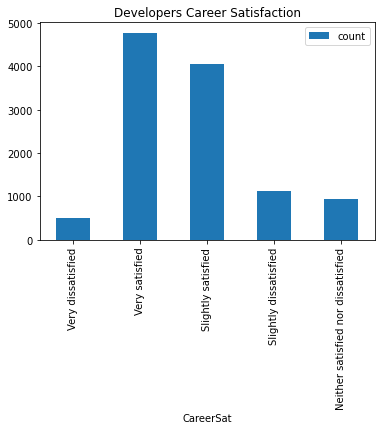

In [64]:
df_CareerSat = df_demo.groupby('CareerSat').count().toPandas()
df_CareerSat.plot.bar(x="CareerSat", y="count", title="Developers Career Satisfaction")
plot.show()

QUESTION 3: HOW MANY PEOPLE THAT ANSWER THE SURVEY ARE FROM MALAYSIA?

In [25]:
df_demo.select('Respondent').where(df_demo.Country == "Malaysia").distinct().count()

42

QUESTION 4: WHAT IS THE SUMMARY OF YEARS THAT RESPONDENTS FROM MALAYSIA DO CODING?

In [55]:
df_demo.where(df_demo.Country == 'Malaysia').describe('YearsCode_cleaned').show()

+-------+-----------------+
|summary|YearsCode_cleaned|
+-------+-----------------+
|  count|               42|
|   mean|9.476190476190476|
| stddev|4.939823711864355|
|    min|                1|
|    max|               22|
+-------+-----------------+



QUESTION 5: DO YOU CONSIDER MALAYSIAN DEVELOPER AS OVERWORK?

First we need to extract the summary of weekly working hours for the whole datasets.

In [76]:
df_demo = df_demo.withColumn('WorkWeekHrs', df_demo.WorkWeekHrs.cast('int'))
df_demo = df_demo.na.fill(0, ['WorkWeekHrs'])
df_demo.describe('WorkWeekHrs').show()

+-------+------------------+
|summary|       WorkWeekHrs|
+-------+------------------+
|  count|             11398|
|   mean|  41.5964204246359|
| stddev|24.922791250785306|
|    min|                 0|
|    max|              1012|
+-------+------------------+



Then we compare them with weekly working hours for Malaysian

In [80]:
df_demo.where(df_demo.Country == 'Malaysia').describe('WorkWeekHrs').show()

+-------+------------------+
|summary|       WorkWeekHrs|
+-------+------------------+
|  count|                42|
|   mean|38.166666666666664|
| stddev| 12.33459672720451|
|    min|                 0|
|    max|                56|
+-------+------------------+



Answer: MALAYSIAN DEVELOPERS ARE NOT CONSIDERED OVERWORK SINCE THE MEAN OF HOURS WORKING WEEKLY IS LESS THAN THE MEAN OF THE WHOLE WORLD.

QUESTION 6: WHAT IS THE MOST FAMOUS PROGRAMMING LANGUAGE USED AMONG MALAYSIAN DEVELOPER?

Collect respondent from Malaysia

In [86]:
dev_my = df_demo.select('Respondent').where(df_demo.Country == "Malaysia").distinct().collect()
dev_my

[Row(Respondent='14899'),
 Row(Respondent='14361'),
 Row(Respondent='16626'),
 Row(Respondent='18882'),
 Row(Respondent='786'),
 Row(Respondent='3720'),
 Row(Respondent='6100'),
 Row(Respondent='13580'),
 Row(Respondent='1185'),
 Row(Respondent='2805'),
 Row(Respondent='12904'),
 Row(Respondent='19599'),
 Row(Respondent='8334'),
 Row(Respondent='19257'),
 Row(Respondent='16353'),
 Row(Respondent='10797'),
 Row(Respondent='10601'),
 Row(Respondent='2187'),
 Row(Respondent='9311'),
 Row(Respondent='10531'),
 Row(Respondent='11266'),
 Row(Respondent='4599'),
 Row(Respondent='21206'),
 Row(Respondent='5167'),
 Row(Respondent='16213'),
 Row(Respondent='9488'),
 Row(Respondent='23575'),
 Row(Respondent='8736'),
 Row(Respondent='17243'),
 Row(Respondent='21479'),
 Row(Respondent='5958'),
 Row(Respondent='9574'),
 Row(Respondent='769'),
 Row(Respondent='21822'),
 Row(Respondent='14646'),
 Row(Respondent='18633'),
 Row(Respondent='8670'),
 Row(Respondent='5281'),
 Row(Respondent='14206'),
 Row(

Check language used in the survey

In [83]:
df_tech.select('LanguageWorkedWith').distinct().collect()

[Row(LanguageWorkedWith='C#'),
 Row(LanguageWorkedWith='VBA'),
 Row(LanguageWorkedWith='Rust'),
 Row(LanguageWorkedWith='JavaScript'),
 Row(LanguageWorkedWith=None),
 Row(LanguageWorkedWith='Erlang'),
 Row(LanguageWorkedWith='C++'),
 Row(LanguageWorkedWith='F#'),
 Row(LanguageWorkedWith='Dart'),
 Row(LanguageWorkedWith='C'),
 Row(LanguageWorkedWith='Objective-C'),
 Row(LanguageWorkedWith='Swift'),
 Row(LanguageWorkedWith='TypeScript'),
 Row(LanguageWorkedWith='Bash/Shell/PowerShell'),
 Row(LanguageWorkedWith='Elixir'),
 Row(LanguageWorkedWith='R'),
 Row(LanguageWorkedWith='Scala'),
 Row(LanguageWorkedWith='Clojure'),
 Row(LanguageWorkedWith='PHP'),
 Row(LanguageWorkedWith='Kotlin'),
 Row(LanguageWorkedWith='SQL'),
 Row(LanguageWorkedWith='Go'),
 Row(LanguageWorkedWith='WebAssembly'),
 Row(LanguageWorkedWith='Ruby'),
 Row(LanguageWorkedWith='Python'),
 Row(LanguageWorkedWith='HTML/CSS'),
 Row(LanguageWorkedWith='Assembly'),
 Row(LanguageWorkedWith='Java'),
 Row(LanguageWorkedWith='Other

Convert the respondent into List

In [89]:
listdev_my = [row.Respondent for row in dev_my]
listdev_my

['14899',
 '14361',
 '16626',
 '18882',
 '786',
 '3720',
 '6100',
 '13580',
 '1185',
 '2805',
 '12904',
 '19599',
 '8334',
 '19257',
 '16353',
 '10797',
 '10601',
 '2187',
 '9311',
 '10531',
 '11266',
 '4599',
 '21206',
 '5167',
 '16213',
 '9488',
 '23575',
 '8736',
 '17243',
 '21479',
 '5958',
 '9574',
 '769',
 '21822',
 '14646',
 '18633',
 '8670',
 '5281',
 '14206',
 '15485',
 '11767',
 '24618']

Filter only those in list to a new table

In [93]:
df_tech_my = df_tech.filter(df_tech.Respondent.isin(listdev_my))
df_tech_my.select('Respondent').distinct().count()

42

Group by language and count for each language

In [107]:
language_rank = df_tech_my.groupby('LanguageWorkedWith').count()
language_rank.show()

+--------------------+-----+
|  LanguageWorkedWith|count|
+--------------------+-----+
|                  C#|    8|
|                 VBA|    5|
|          JavaScript|   34|
|                null|   63|
|                 C++|    6|
|                Dart|    3|
|                   C|    7|
|         Objective-C|    2|
|               Swift|    2|
|          TypeScript|    9|
|Bash/Shell/PowerS...|   12|
|                   R|    6|
|               Scala|    1|
|                 PHP|   20|
|              Kotlin|    3|
|                 SQL|   22|
|                  Go|    8|
|                Ruby|    3|
|              Python|   14|
|            HTML/CSS|   34|
+--------------------+-----+
only showing top 20 rows



Perform Cleaning and convert it to pandas for visualization

In [108]:
language_rank = language_rank.where(language_rank.LanguageWorkedWith != 'null')
language_rank = language_rank.withColumn('percentage',f.col('count')/f.sum('count').over(Window.partitionBy())*100)
language_rank = language_rank.toPandas()
language_rank

,LanguageWorkedWith,count,percentage
0,C#,8,3.571429
1,VBA,5,2.232143
2,JavaScript,34,15.178571
3,C++,6,2.678571
4,Dart,3,1.339286
5,C,7,3.125000
6,Objective-C,2,0.892857
7,Swift,2,0.892857
8,TypeScript,9,4.017857
9,Bash/Shell/PowerShell,12,5.357143


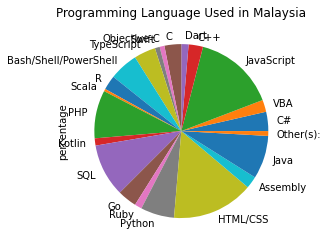

In [114]:
pie_chart = language_rank.plot.pie(y="percentage", labels = language_rank['LanguageWorkedWith'].tolist(), title="Programming Language Used in Malaysia")
pie_chart.get_legend().remove()
plot.show()

Answer: THE MOST FAMOUS PROGRAMMING LANGUAGE IN MALAYSIA ARE HTML/CSS AND JAVASCRIPT.